In [ ]:
Рубежный контроль №2
Носкин С.А. ИУ5-63Б
Вариант №8
Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
Методы ИУ5-63 - Дерево решений и Случайный лес
Набор данных: https://www.kaggle.com/lava18/google-play-store-apps
Библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
Загрузка и первичная обработка данных

In [2]:
data=pd.read_csv('googleplaystore.csv', sep=",")
# размер набора данных
data.shape

(10841, 13)

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((10841, 13), (9360, 13))

In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:

#Price не нужен потому что, почти все значение 0-ые
data.drop(['Current Ver', 'Android Ver', 'Type', 'Genres', 'Last Updated', 'App', 'Content Rating'], axis = 1, inplace = True)

In [8]:
data_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
#Ограничение в 500 элементов
parts = np.split(data, [500], axis=0)
data_new = parts[0]

In [10]:
data_new.shape

(500, 6)

In [11]:

le = LabelEncoder()
le.fit(data_new.Category)
data_new['Category'] = le.transform(data_new.Category)
data_new
data_new['Size'] = data_new['Size'].map(lambda x: str(x)[:-1]) 
data_new['Installs'] = data_new['Installs'].map(lambda x: str(x)[:-1])
data_new['Installs'] = data_new['Installs'].replace(',','', regex=True)
data_new['Size'] = data_new['Size'].replace(['Varies with devic'], np.nan)
data_new['Price'] = data_new.Price.str.replace('$','')

C:\Users\noski\AppData\Local\Temp\ipykernel_17816\3664500281.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_new['Price'] = data_new.Price.str.replace('$','')


In [12]:
data_new.head()
data_new['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99'], dtype=object)

In [13]:

data_new = data_new.dropna(axis=0, how='any')
data_new.isnull().sum()

Category    0
Rating      0
Reviews     0
Size        0
Installs    0
Price       0
dtype: int64

In [14]:
data_new['Reviews'].unique()

array(['159', '967', '87510', '215644', '167', '178', '36815', '13791',
       '121', '13880', '8788', '44829', '4326', '1518', '55', '3632',
       '27', '194216', '224399', '450', '654', '7699', '118', '192',
       '20260', '203', '136', '223', '1120', '227', '5035', '1015', '353',
       '564', '8145', '158', '591', '117', '176', '2206', '26', '174531',
       '1070', '85', '845', '367', '1598', '284', '129', '542', '10479',
       '805', '1403', '3971', '534', '7774', '38846', '2431', '6090',
       '295', '190', '52530', '116986', '1379', '271920', '7021', '197',
       '737', '3574', '994', '197136', '142', '15168', '2155', '138',
       '5414', '348', '250', '3617', '4806', '31433', '5097', '1754',
       '2680', '1288', '18900', '49790', '1150', '1739', '2225', '4369',
       '8572', '964', '104', '601', '36', '187', '30', '134', '74',
       '9315', '75', '38', '26834', '2277', '2280', '184', '9', '364',
       '18', '473', '66', '3871', '257', '62', '1857', '4478', '418',
  

In [ ]:
Масштабирование данных
MinMax масштабирование

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [16]:
# Числовые колонки для масштабирования
num_cols = ['Rating','Reviews', 'Installs', 'Category', 'Price']
scale_cols = num_cols

In [17]:
sc1 = MinMaxScaler()
sc1_data_new = sc1.fit_transform(data_new[scale_cols])

In [18]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_new[new_col_name] = sc1_data_new[:,i]

C:\Users\noski\AppData\Local\Temp\ipykernel_17816\3481766874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[new_col_name] = sc1_data_new[:,i]
C:\Users\noski\AppData\Local\Temp\ipykernel_17816\3481766874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[new_col_name] = sc1_data_new[:,i]
C:\Users\noski\AppData\Local\Temp\ipykernel_17816\3481766874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [19]:
data_new.head()

,Category,Rating,Reviews,Size,Installs,Price,Rating_scaled,Reviews_scaled,Installs_scaled,Category_scaled,Price_scaled
0,0,4.1,159,19,10000,0,0.625000,0.000009,0.00002,0.0,0.0
1,0,3.9,967,14,500000,0,0.541667,0.000054,0.00100,0.0,0.0
2,0,4.7,87510,8.7,5000000,0,0.875000,0.004940,0.01000,0.0,0.0
3,0,4.5,215644,25,50000000,0,0.791667,0.012173,0.10000,0.0,0.0
4,0,4.3,967,2.8,100000,0,0.708333,0.000054,0.00020,0.0,0.0


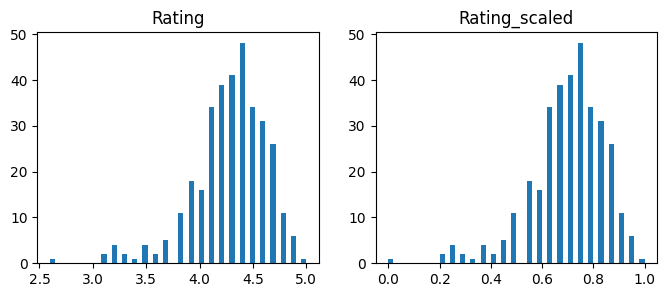

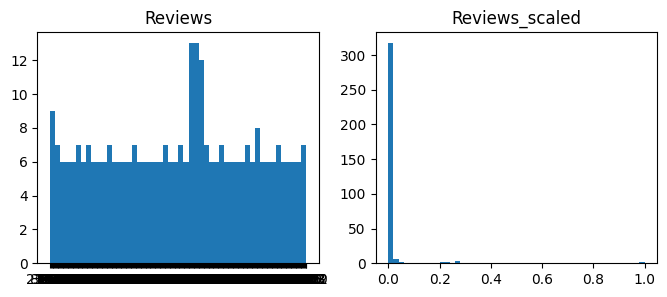

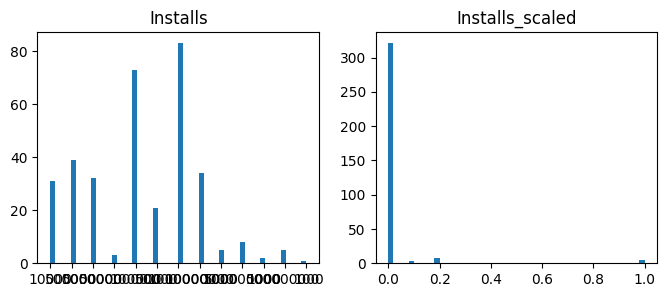

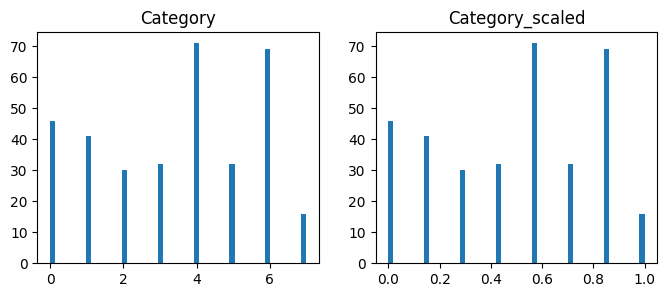

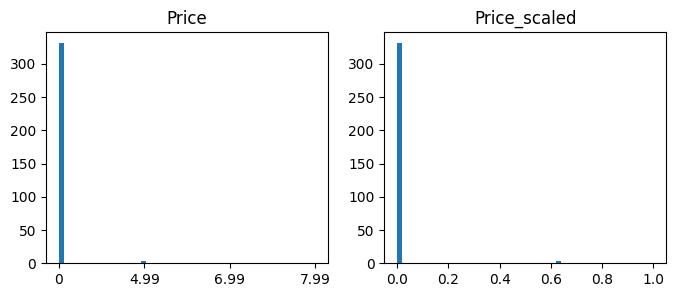

In [20]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_new[col], 50)
    ax[1].hist(data_new[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [21]:

data_new.drop(['Rating', 'Reviews', 'Installs', 'Category', 'Price'], axis = 1, inplace = True)

C:\Users\noski\AppData\Local\Temp\ipykernel_17816\3316103338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop(['Rating', 'Reviews', 'Installs', 'Category', 'Price'], axis = 1, inplace = True)


In [22]:

X = data_new.drop(['Rating_scaled'], axis = 1)
Y = data_new.Rating_scaled
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

   Size  Reviews_scaled  Installs_scaled  Category_scaled  Price_scaled
0   19        0.000009          0.00002              0.0           0.0
1   14        0.000054          0.00100              0.0           0.0
2  8.7        0.004940          0.01000              0.0           0.0
3   25        0.012173          0.10000              0.0           0.0
4  2.8        0.000054          0.00020              0.0           0.0 

Выходные данные:

 0    0.625000
1    0.541667
2    0.875000
3    0.791667
4    0.708333
Name: Rating_scaled, dtype: float64


In [23]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.30)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     Size  Reviews_scaled  Installs_scaled  Category_scaled  Price_scaled
48   7.9        0.000048           0.0002         0.000000           0.0
270   26        0.000102           0.0002         0.571429           0.0
281  8.6        0.000327           0.0002         0.571429           0.0
302   15        0.000047           0.0001         0.714286           0.0
197  3.9        0.000252           0.0010         0.571429           0.0 

Входные параметры тестовой выборки:

     Size  Reviews_scaled  Installs_scaled  Category_scaled  Price_scaled
58   201        0.000079           0.0002         0.142857           0.0
56   5.6        0.000045           0.0001         0.142857           0.0
387   25        0.007452           0.0200         0.857143           0.0
379   61        0.001412           0.0100         0.857143           0.0
267   20        0.001655           0.0100         0.571429           0.0 

Выходные параметры обучающей выборки:

 48 

In [ ]:
Модель "Дерево решений"

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
data_new['Size'] = data_new['Size'].replace(['Varies with devic'], np.nan)

C:\Users\noski\AppData\Local\Temp\ipykernel_17816\1680488691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Size'] = data_new['Size'].replace(['Varies with devic'], np.nan)


In [26]:
data_new.isnull().sum()

Size               0
Rating_scaled      0
Reviews_scaled     0
Installs_scaled    0
Category_scaled    0
Price_scaled       0
dtype: int64

In [27]:
dtc = DecisionTreeRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_dtc = dtc.predict(X_test)

In [ ]:
Модель "Случайный лес"

In [28]:

from sklearn.ensemble import RandomForestRegressor

In [29]:
RF = RandomForestRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_rf = RF.predict(X_test)

In [30]:

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Оценка качества моделей:
В качестве метрик для оценки качества моделей я использую Mean squared error (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и метрику 
 (коэффициент детерминации), потому что эта метрика является нормированной.

In [31]:
#Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(Y_test, data_test_predicted_dtc), mean_squared_error(Y_test, data_test_predicted_rf)))


Метрика MSE:
Дерево решений: 0.03439882897603485
Случайный лес: 0.018648308142701533


In [32]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(Y_test, data_test_predicted_dtc), r2_score(Y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: -0.6883599790328916
Случайный лес: 0.08470555300746929


In [ ]:
Вывод
Исходя из оценки качества построенных моделей можно увидеть, что набор данных не подоходит для данных методов, потому что выборка значений слишком маленькая, например в Price из 500 значений 480 - это нули, из-за этого не получается сделать возможным нормальное масштабирование.